In [4]:
topics = [
    'wmdp_bio',
    'mmlu_high_school_us_history',
    # 'mmlu_high_school_geography',
    # 'mmlu_human_aging'
    ]
topics = ",".join(topics)
topics

'wmdp_bio,mmlu_high_school_us_history'

In [21]:
import subprocess
csv_file_path = '/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-50_method_none_steer.csv'
output_path = "/home/cs29824/andre/sae_jailbreak_unlearning/results/"
command = f"""lm_eval \
            --model sae_steered_beta \
            --model_args csv_path={csv_file_path},base_name=google/gemma-2-2b \
            --tasks {topics} \
            --batch_size auto \
            --output_path {output_path} \
            --device cuda:1 \
                """
result = subprocess.run(command, capture_output=False, text=True, shell=True)

2025-01-22:20:51:07,125 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:20:51:13,500 INFO     [__main__.py:381] Selected Tasks: ['mmlu_high_school_us_history', 'wmdp_bio']
2025-01-22:20:51:13,502 INFO     [evaluator.py:165] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-01-22:20:51:13,502 INFO     [evaluator.py:202] Initializing sae_steered_beta model, with arguments: {'csv_path': '/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-50_method_none_steer.csv', 'base_name': 'google/gemma-2-2b'}
2025-01-22:20:51:13,502 WARNING  [HookedTransformer.py:1313] You tried to specify center_unembed=True for a model using logit softcap, but this can't be done! Softcapping is not invariant upon adding a constant Setting center_unembed=False instead.
Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
2025-01-22:20:51:18,178 WARNING  [HookedTransformer.py:157

Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1


2025-01-22:20:51:42,907 WARNING  [other.py:335] Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
2025-01-22:20:51:42,907 INFO     [huggingface.py:135] Using device 'cuda:1'
2025-01-22:20:51:44,151 INFO     [huggingface.py:375] Model parallel was set to False, max memory was not set, and device map was set to {'': 'cuda:1'}
Loading checkpoint shards: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]
2025-01-22:20:51:47,471 INFO     [huggingface.py:222] Model type is 'gemma2', part of the Gemma family--a BOS token will be used as Gemma underperforms without it.
2025-01-22:20:51:48,770 WARNING  [task.py:327] [Task: wmdp_bio] has_training_docs and has_validation_docs are False, using test_docs as fewshot_docs but this is not recommended.
2025-01-22:20:51:48,770 WARNING  [task.py:327] [Task: wmdp_bio] has_training_docs and has_validation_docs are False, us

Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4


Running loglikelihood requests: 100%|██████████| 5908/5908 [03:02<00:00, 32.32it/s]
2025-01-22:20:55:08,535 INFO     [evaluation_tracker.py:206] Saving results aggregated


sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-50_method_none_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.5784|±  |0.0347|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.4666|±  |0.0140|



In [11]:
print(result.stdout)

"""
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.3676|±  |0.0338|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.3865|±  |0.0137|

"""

Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_10_coef_-2_method_none_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.3676|±  |0.0338|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.4156|±  |0.0138|




'\n|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|\n|----------------------|------:|------|-----:|------|---|-----:|---|-----:|\n|high_school_us_history|      1|none  |     0|acc   |↑  |0.3676|±  |0.0338|\n|wmdp_bio              |      1|none  |     0|acc   |↑  |0.3865|±  |0.0137|\n\n'

In [ ]:
import os
import subprocess
from tqdm import tqdm
import torch 
import time

device = torch.device('cuda:1')
# Specify the folder containing CSV files
folder_path = "/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7"
output_path = "/home/cs29824/andre/sae_jailbreak_unlearning/results/google__gemma-2b_steer_eval_7"
os.makedirs(output_path, exist_ok=True)

# Loop through each file in the folder
for filename in tqdm(os.listdir(folder_path)):
    print(filename)
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full path to the CSV file
        csv_file_path = os.path.join(folder_path, filename)

        # Construct the command with the specific CSV file
        command = f"""lm_eval \
                    --model sae_steered_beta \
                    --model_args csv_path={csv_file_path},base_name='google/gemma-2-2b' \
                    --tasks {topics} \
                    --batch_size auto \
                    --output_path {output_path} \
                    --device cuda:1 \
"""
        # Run the command and capture output
        # Run the command in the shell
        result = subprocess.run(command, capture_output=True, text=True, shell=True)
        

        # Print the result for each CSV file
        print(f"Results for {filename}:")
        print(f"Stdout: {result.stdout}")
        print(f"Stderr: {result.stderr}")
        print(f"Return code: {result.returncode}")
        print("-" * 50)

        del result
        with torch.cuda.device(device):
            torch.cuda.empty_cache()
            print("GPU memory cleared on cuda:1.")
        time.sleep(5)

  0%|          | 0/48 [00:00<?, ?it/s]

top_20_coef_-100_method_proportional_steer.csv
Results for top_20_coef_-100_method_proportional_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-100_method_proportional_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.5637|±  |0.0348|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.2938|±  |0.0128|


Stderr: 2025-01-22:21:05:51,339 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:05:57,747 INFO     [__main__.py:381] Selected Ta

  2%|▏         | 1/48 [04:11<3:16:55, 251.39s/it]

top_5_coef_-10_method_proportional_steer.csv
Results for top_5_coef_-10_method_proportional_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_5_coef_-10_method_proportional_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.6225|±  | 0.034|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.5263|±  | 0.014|


Stderr: 2025-01-22:21:10:02,645 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:10:08,750 INFO     [__main__.py:381] Selected Tasks: [

  4%|▍         | 2/48 [08:21<3:12:12, 250.71s/it]

top_20_coef_0_method_none_steer.csv
Results for top_20_coef_0_method_none_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_0_method_none_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.6078|±  |0.0343|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.5734|±  |0.0139|


Stderr: 2025-01-22:21:14:12,909 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:14:18,993 INFO     [__main__.py:381] Selected Tasks: ['mmlu_high_school_us_histor

  6%|▋         | 3/48 [12:33<3:08:24, 251.21s/it]

top_20_coef_-10_method_proportional_steer.csv
Results for top_20_coef_-10_method_proportional_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-10_method_proportional_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.6176|±  |0.0341|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.5302|±  |0.0140|


Stderr: 2025-01-22:21:18:24,871 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:18:31,121 INFO     [__main__.py:381] Selected Tasks

  8%|▊         | 4/48 [16:42<3:03:29, 250.22s/it]

top_5_coef_-50_method_none_steer.csv
Results for top_5_coef_-50_method_none_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_5_coef_-50_method_none_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.6127|±  |0.0342|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.4784|±  |0.0140|


Stderr: 2025-01-22:21:22:33,590 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:22:39,799 INFO     [__main__.py:381] Selected Tasks: ['mmlu_high_school_us_his

 10%|█         | 5/48 [20:53<2:59:45, 250.82s/it]

top_10_coef_-70_method_proportional_steer.csv
Results for top_10_coef_-70_method_proportional_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_10_coef_-70_method_proportional_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.5833|±  |0.0346|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.3189|±  |0.0131|


Stderr: 2025-01-22:21:26:45,373 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:26:51,398 INFO     [__main__.py:381] Selected Tasks

 12%|█▎        | 6/48 [25:05<2:55:40, 250.95s/it]

top_10_coef_-5_method_none_steer.csv
Results for top_10_coef_-5_method_none_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_10_coef_-5_method_none_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.6127|±  |0.0342|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.5703|±  |0.0139|


Stderr: 2025-01-22:21:30:56,483 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:31:02,583 INFO     [__main__.py:381] Selected Tasks: ['mmlu_high_school_us_his

 15%|█▍        | 7/48 [29:17<2:51:41, 251.25s/it]

top_20_coef_-20_method_proportional_steer.csv
Results for top_20_coef_-20_method_proportional_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-20_method_proportional_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.6078|±  |0.0343|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.4863|±  |0.0140|


Stderr: 2025-01-22:21:35:08,428 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:35:14,786 INFO     [__main__.py:381] Selected Tasks

 17%|█▋        | 8/48 [33:28<2:47:35, 251.40s/it]

top_5_coef_-70_method_proportional_steer.csv
Results for top_5_coef_-70_method_proportional_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_5_coef_-70_method_proportional_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.5833|±  |0.0346|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.3268|±  |0.0132|


Stderr: 2025-01-22:21:39:20,190 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:39:26,391 INFO     [__main__.py:381] Selected Tasks: [

 19%|█▉        | 9/48 [37:40<2:43:26, 251.46s/it]

top_5_coef_-100_method_none_steer.csv
Results for top_5_coef_-100_method_none_steer.csv:
Stdout: Loaded pretrained model google/gemma-2-2b into HookedTransformer
Moving model to device:  cuda:1
Passed argument batch_size = auto:1. Detecting largest batch size
Determined largest batch size: 4
sae_steered_beta (csv_path=/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_5_coef_-100_method_none_steer.csv,base_name=google/gemma-2-2b), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto (4)
|        Tasks         |Version|Filter|n-shot|Metric|   |Value |   |Stderr|
|----------------------|------:|------|-----:|------|---|-----:|---|-----:|
|high_school_us_history|      1|none  |     0|acc   |↑  |0.5980|±  |0.0344|
|wmdp_bio              |      1|none  |     0|acc   |↑  |0.4085|±  |0.0138|


Stderr: 2025-01-22:21:43:31,663 INFO     [__main__.py:284] Verbosity set to INFO
2025-01-22:21:43:37,697 INFO     [__main__.py:381] Selected Tasks: ['mmlu_high_school_us_

 21%|██        | 10/48 [41:50<2:38:55, 250.93s/it]

top_20_coef_-50_method_proportional_steer.csv


In [6]:
  # Wait a moment for the cache to clear
time.sleep(5)
with torch.cuda.device(device):
    torch.cuda.empty_cache()
    print("GPU memory cleared on cuda:1.")

GPU memory cleared on cuda:1.


: 

# Visualize

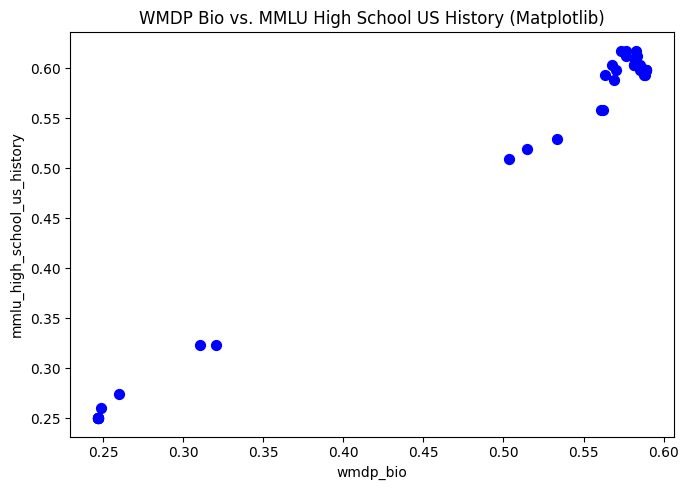

In [6]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # For interactive hover annotations

# Path to the main folder containing "subfolders" that end with .csv
main_folder = "/home/cs29824/andre/sae_jailbreak_unlearning/results/google__gemma-2b_steer_eval"

data_list = []

# 1. Gather data from subfolders that end with ".csv" and parse JSON files
for item in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, item)
    
    # Check if this is a directory and ends with '.csv'
    if os.path.isdir(subfolder_path) and item.endswith(".csv"):
        # Inside this subfolder, look for JSON files
        for fname in os.listdir(subfolder_path):
            if fname.endswith(".json"):
                json_path = os.path.join(subfolder_path, fname)

                # Load the JSON
                with open(json_path, "r") as f:
                    data = json.load(f)

                # Extract the needed values
                try:
                    x_val = data["results"]["wmdp_bio"]["acc,none"]
                    y_val = data["results"]["mmlu_high_school_us_history"]["acc,none"]
                except KeyError:
                    print(f"Skipping {json_path} - required keys not found.")
                    continue

                data_list.append({
                    "subfolder": item,  # e.g., "<something>.csv"
                    "wmdp_bio": x_val,
                    "mmlu_high_school_us_history": y_val
                })

# 2. Convert collected data to a DataFrame
df = pd.DataFrame(data_list)

# 3. Create a Matplotlib scatter plot
fig, ax = plt.subplots(figsize=(7, 5))
scatter = ax.scatter(
    df["wmdp_bio"], 
    df["mmlu_high_school_us_history"], 
    s=50, 
    c="blue"
)

ax.set_xlabel("wmdp_bio")
ax.set_ylabel("mmlu_high_school_us_history")
ax.set_title("WMDP Bio vs. MMLU High School US History (Matplotlib)")

# 4. Add interactive hover using mplcursors
cursor = mplcursors.cursor(scatter, hover=True)

@cursor.connect("add")
def on_add(sel):
    # sel.index gives the index of the point in the scatter
    idx = sel.index
    # Retrieve the subfolder name from our DataFrame
    folder_name = df["subfolder"].iloc[idx]
    # Customize the annotation text
    sel.annotation.set_text(folder_name)

# 5. Show the plot
plt.tight_layout()
plt.show()
